In [1]:
from npl.core import Nanoparticle
from npl.descriptors.local_environment_feature_classifier import LocalEnvironmentFeatureClassifier
from npl.calculators import BayesianRRCalculator
from npl.descriptors.global_feature_classifier import testTopologicalFeatureClassifier

In [2]:
"""Create one randomly ordered start particle"""

def create_start_particle(height, trunc, stoichiometry):
    start_particle = Nanoparticle()
    start_particle.truncated_octahedron(height, trunc, stoichiometry)
    return start_particle

In [3]:
from npl.calculators.energy_calculator import compute_coefficients_for_linear_topological_model
from npl.calculators import BayesianRRCalculator

global_energy_calculator = BayesianRRCalculator.load('bayesian_rr_calculator.pkl')
global_topological_coefficients = global_energy_calculator.get_coefficients()
print(global_topological_coefficients)
symbols = ['Au', 'Pt']
n_atoms = 79
coefficients, total_energies = compute_coefficients_for_linear_topological_model(
    global_topological_coefficients,
    symbols, n_atoms)

energy_calculator = BayesianRRCalculator('TEC')
energy_calculator.set_coefficients(coefficients)

[-0.03324188  0.23653363  0.57347929  0.4383208   0.          0.
  0.          0.          0.          0.          0.83566493  0.81418273
  0.          1.15364881  0.          0.          1.57971154]
Coef symbol_a: Au


In [4]:
from npl.descriptors.local_environment_feature_classifier import TopologicalEnvironmentClassifier
from npl.descriptors.local_environment_calculator import NeighborCountingEnvironmentCalculator


local_feature_classifier = TopologicalEnvironmentClassifier(NeighborCountingEnvironmentCalculator(symbols), symbols)

In [5]:
from npl.monte_carlo.monte_carlo_global_features import run_monte_carlo

feature_classifier = testTopologicalFeatureClassifier(symbols)
start_particle = create_start_particle(5, 1, {'Au': 24, 'Pt': 55})
beta, max_steps = 100, 100


[best_particle, accepted_energies] = run_monte_carlo(beta,
                                                     max_steps,
                                                     start_particle, 
                                                     global_energy_calculator, 
                                                     feature_classifier)

In [6]:
from ase.visualize import view

view(best_particle.get_ase_atoms(), viewer='x3d')

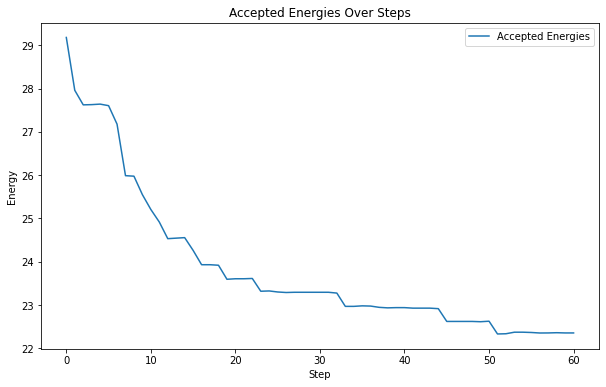

In [7]:
import matplotlib.pyplot as plt

# Extract energies from the accepted_energies list
energies = [energy for energy, _ in accepted_energies]

# Plot the energies
plt.figure(figsize=(10, 6))
plt.plot(energies, label='Accepted Energies')
plt.xlabel('Step')
plt.ylabel('Energy')
plt.title('Accepted Energies Over Steps')
plt.legend()
plt.show()

In [8]:
from npl.monte_carlo import run_monte_carlo as rmc

start_particle = create_start_particle(5, 1, {'Au': 24, 'Pt': 55})
beta, max_steps = 100, 1000


[best_particle, accepted_energies] = rmc(beta, max_steps, start_particle, energy_calculator, local_feature_classifier)

Step: 2000
Lowest energy: 22.25065148851377


In [9]:
from ase.visualize import view

view(best_particle.get_ase_atoms(), viewer='x3d')

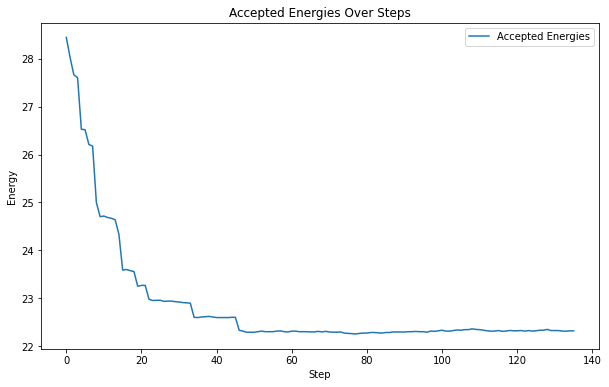

In [10]:
import matplotlib.pyplot as plt

# Extract energies from the accepted_energies list
energies = [energy for energy, _ in accepted_energies]

# Plot the energies
plt.figure(figsize=(10, 6))
plt.plot(energies, label='Accepted Energies')
plt.xlabel('Step')
plt.ylabel('Energy')
plt.title('Accepted Energies Over Steps')
plt.legend()
plt.show()

In [13]:
from npl.optimization.basin_hopping import run_basin_hopping

[best_particle, lowest_energies, flip_energy_list] = run_basin_hopping(start_particle, energy_calculator, total_energies, 1000, 4,
                      local_feature_classifier=None)

Energy after local_opt: 22.256, lowest 22.256
Energy after local_opt: 22.244, lowest 22.244
Energy after local_opt: 22.244, lowest 22.239
Energy after local_opt: 22.244, lowest 22.239
Energy after local_opt: 22.244, lowest 22.239
Energy after local_opt: 22.244, lowest 22.239
Energy after local_opt: 22.244, lowest 22.233
Energy after local_opt: 22.233, lowest 22.233
Energy after local_opt: 22.244, lowest 22.233
Energy after local_opt: 22.244, lowest 22.233
Energy after local_opt: 22.273, lowest 22.233
Energy after local_opt: 22.244, lowest 22.233
Energy after local_opt: 22.239, lowest 22.233
Energy after local_opt: 22.244, lowest 22.233
Energy after local_opt: 22.244, lowest 22.233
Energy after local_opt: 22.244, lowest 22.233
Energy after local_opt: 22.244, lowest 22.233
Energy after local_opt: 22.239, lowest 22.233
Energy after local_opt: 22.239, lowest 22.233
Energy after local_opt: 22.244, lowest 22.233
Energy after local_opt: 22.244, lowest 22.233
Energy after local_opt: 22.239, lo